In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('FAA_data.xlsx')
data

,Sp#,Laser power,Scanning speed (mm/s),Hatch distance (um),Layer thickness (um),Volume energy density (J/mm3),Distance,Area,Perimeter,Equivalent radius,...,Max Ferret,Min Ferret,Circularity,Aspect ratio,Elongation,Roundness,Solidity,Stress amplitude,Type,Cycles to Failure
0,RV03,280.0,1200,140.0,30,55.555556,291.472428,5126.458,903.684,40.395572,...,204.743,106.368,0.790,0.512295,1.952,0.512,0.354,450,LoF,4305823
1,RV10,280.0,1200,140.0,30,55.555556,213.099908,2510.222,279.901,28.267092,...,83.314,51.827,0.403,0.623441,1.604,0.623,0.795,500,LoF,1544620
2,RV09,280.0,1200,140.0,30,55.555556,834.466898,2638.273,281.825,28.979102,...,82.591,53.540,0.417,0.613874,1.629,0.614,0.780,500,LoF,2136507
3,RV06,280.0,1200,140.0,30,55.555556,214.462796,5327.283,401.671,41.179204,...,155.539,63.473,0.415,0.323625,3.090,0.324,0.780,600,LoF,33689
4,RV15,280.0,1200,140.0,30,55.555556,81.915605,4477.534,549.053,37.752395,...,153.047,75.115,0.187,0.445038,2.247,0.445,0.489,450,LoF,3616919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,94-viii,280.0,1300,120.0,40,44.871795,648.873000,2435.783,269.325,27.844817,...,125.757,32.524,0.422,0.254388,3.931,0.254,0.897,500,LoF,2900679
164,81-viii,280.0,1300,120.0,40,44.871795,679.789000,1712.020,150.061,23.344226,...,54.721,40.664,0.955,0.769231,1.300,0.769,1.000,600,KH,75342
165,87-viii,280.0,1300,120.0,40,44.871795,966.131000,1186.779,125.668,19.436139,...,44.572,33.792,0.944,0.761615,1.313,0.762,0.998,700,KH,234308
166,92-viii,280.0,1300,120.0,40,44.871795,291.758000,3355.776,344.110,32.682972,...,107.176,77.284,0.356,0.825764,1.211,0.826,0.585,600,LoF,284141


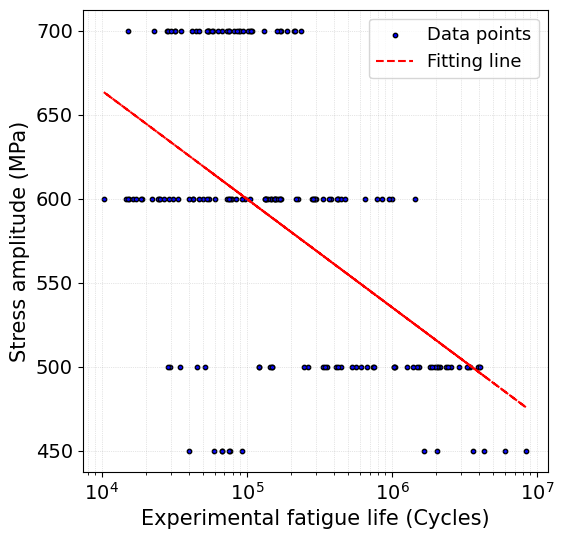

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming data is already loaded into 'data'
stress_levels = data['Stress amplitude']
num_cycles = data['Cycles to Failure']

# Create a figure for the plot
fig = plt.figure(figsize=(6, 6))

# Scatter plot for the S-N curve
plt.scatter(num_cycles, stress_levels, s=10, color='blue', edgecolor='black', label='Data points')

# Set axis labels
plt.ylabel('Stress amplitude (MPa)', fontsize=15)
plt.xlabel('Experimental fatigue life (Cycles)', fontsize=15)

# Set logarithmic scale for the x-axis
plt.xscale('log')

# Customize grid with more transparency
plt.grid(True, which='both', linestyle=':', linewidth=0.5, color='gray', alpha=0.4)  # Set grid transparency

# Customize tick labels
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)

# Add a fitting line (linear regression in log-log scale)
log_cycles = np.log10(num_cycles)
fit_coefficients = np.polyfit(log_cycles, stress_levels, 1)  # Linear fit on log-log scale
fit_line = np.polyval(fit_coefficients, log_cycles)

# Plot the fitting line with red dotted style
plt.plot(num_cycles, fit_line, 'r--', label='Fitting line')

# Add legend
plt.legend(loc='best', fontsize=13)

# Show the plot
plt.show()


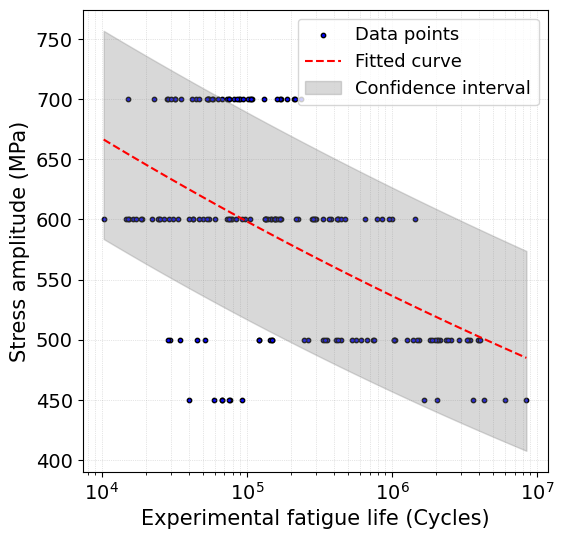

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Assuming data is already loaded into 'data'
stress_levels = data['Stress amplitude']
num_cycles = data['Cycles to Failure']

# Define a function to model the power-law relationship for the S-N curve
def power_law(x, a, b):
    return a * np.power(x, b)

# Fit the model to data
p_opt, p_cov = curve_fit(power_law, num_cycles, stress_levels)

# Extract the fit parameters and their standard errors
a_opt, b_opt = p_opt
perr = np.sqrt(np.diag(p_cov))  # Standard errors of the fit parameters

# Generate x values for the fit
x_fit = np.logspace(np.log10(min(num_cycles)), np.log10(max(num_cycles)), 100)
y_fit = power_law(x_fit, a_opt, b_opt)

# Compute the error bounds (assuming symmetric confidence intervals)
y_upper = power_law(x_fit, a_opt + perr[0], b_opt + perr[1])
y_lower = power_law(x_fit, a_opt - perr[0], b_opt - perr[1])



# Create a figure for the plot
fig = plt.figure(figsize=(6, 6))

# Scatter plot for the S-N curve
plt.scatter(num_cycles, stress_levels, s=10, color='blue', edgecolor='black', label='Data points')


# Plot the fitted line
plt.plot(x_fit, y_fit, 'r--', label='Fitted curve')

# Plot the error bounds
plt.fill_between(x_fit, y_lower, y_upper, color='gray', alpha=0.3, label='Confidence interval')


# Set axis labels
plt.ylabel('Stress amplitude (MPa)', fontsize=15)
plt.xlabel('Experimental fatigue life (Cycles)', fontsize=15)

# Set logarithmic scale for the x-axis
plt.xscale('log')

# Customize grid with more transparency
plt.grid(True, which='both', linestyle=':', linewidth=0.5, color='gray', alpha=0.4)  # Set grid transparency

# Customize tick labels
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)


# Add legend
plt.legend(loc='best', fontsize=13)

# Show the plot
plt.show()
